# Wireless EEG systems
Review of wireless EEG (wEEG) systems.

Data, code and figures associated to (Niso et al. 2020)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from brokenaxes import brokenaxes
from matplotlib.lines import Line2D

# Major ticks and minor ticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

from matplotlib.patches import Rectangle 

In [103]:
# Open Googlesheet csv file
df = pd.read_csv('/Users/guiomar/Downloads/Data_Figures_Niso2020 - Devices(5).csv')

In [104]:
df.head()

,Device,Company,Num of Sensors,Num of Sensors (MAX),Sensor Type,Sampling Rate (Hz),Sampling Rate (Hz) (MAX),Bandwidth (Hz),D. Resolution (bits),Battery Life (h),Wireless Protocol,Processing,Firmware update,Certified Medical
0,MindWave Mobile 2,Neurosky,1,1,Dry,512,512,100.0,12,43683,BLE,mixed,✕,✕
1,BrainLink Pro,Neurosky,3,3,Dry,250,250,70.0,16,7,BLE,remote,✓,✕
2,Ganglion,OpenBCI,4,4,Dry/Gel,200,200,150.0,24,NaN,BLE/Wi-Fi,remote,✕,✕
3,NeXus10 MKII,Mindmedia,4,4,Gel,128-8192,8192,NaN,24,5,Bluetooth,remote,✕,CE/FDA
4,INSIGHT,Emotiv,5,5,Wet,128,128,43.0,14,4,BLE,remote,✕,✕


In [105]:
# Prepare the fields of interest

DEV = df['Device']
COMP = df['Company']
SENSTYPE = df['Sensor Type']
NSENS = df['Num of Sensors (MAX)']
SR = df['Sampling Rate (Hz) (MAX)']
RES = df['D. Resolution (bits)']
BAT = df['Battery Life (h)']
WIRE = df['Wireless Protocol']
CERT = df['Certified Medical']

In [106]:
# Store fields in datos
DATOS = pd.DataFrame(
    {'device': DEV,
     'company': COMP,
     'sensors': NSENS,
     'sentype': SENSTYPE,
     'sampling': SR,
     'resolution': RES,
     'battery': BAT,
     'wireless': WIRE,
     'certification': CERT})
#DATOS

In [107]:
# Check devices in each cathegory

dry = [i for i, s in enumerate(SENSTYPE) if 'Dry' in s]
wet = [i for i, s in enumerate(SENSTYPE) if 'Wet' in s]
gel = [i for i, s in enumerate(SENSTYPE) if 'Gel' in s]
#DATOS['device'][dry]

ble = [i for i, s in enumerate(WIRE) if 'BLE' in s]
bluetooth = [i for i, s in enumerate(WIRE) if 'Bluetooth' in s]
wifi = [i for i, s in enumerate(WIRE) if 'Wi-Fi' in s]
prop = [i for i, s in enumerate(WIRE) if 'Prop 2.4GHz' in s]
#DATOS['device'][ble]

ce = [i for i, s in enumerate(CERT) if 'CE' in s]
fda = [i for i, s in enumerate(CERT) if 'FDA' in s]
no = [i for i, s in enumerate(CERT) if '✕' in s]
#DATOS['device'][no]

In [108]:
# Prepare some fields for ploting
DATOS['marker']='x'
DATOS['markersize']=300
DATOS['color']='w'
DATOS['borde']='w'

DATOS.loc[DATOS.sentype=='Dry','color']='y'
DATOS.loc[DATOS.sentype=='Wet','color']='c'
DATOS.loc[DATOS.sentype=='Gel','color']='m'
DATOS.loc[DATOS.sentype=='Dry/Wet','color']='g'
DATOS.loc[DATOS.sentype=='Wet/Gel','color']='b'
DATOS.loc[DATOS.sentype=='Dry/Gel','color']='orange'
DATOS.loc[DATOS.sentype=='Dry/Wet/Gel','color']='k'

DATOS.loc[DATOS.wireless=='BLE','marker']='D'
DATOS.loc[DATOS.wireless=='Bluetooth','marker']='s'
DATOS.loc[DATOS.wireless=='Wi-Fi','marker']='^'
DATOS.loc[DATOS.wireless=='Prop 2.4GHz','marker']='o'
DATOS.loc[DATOS.wireless=='BLE/Wi-Fi','marker']='d'
DATOS.loc[DATOS.wireless=='BLE/Wi-Fi','markersize']=450

DATOS.loc[DATOS.certification=='CE/FDA','borde']='k'
DATOS.loc[DATOS.certification=='CE','borde']='grey'

dev=DATOS['device'].str.split(' ', expand = True)
DATOS['dev1']=dev[0]

DATOS

,device,company,sensors,sentype,sampling,resolution,battery,wireless,certification,marker,markersize,color,borde,dev1
0,MindWave Mobile 2,Neurosky,1,Dry,512,12,43683,BLE,✕,D,300,y,w,MindWave
1,BrainLink Pro,Neurosky,3,Dry,250,16,7,BLE,✕,D,300,y,w,BrainLink
2,Ganglion,OpenBCI,4,Dry/Gel,200,24,NaN,BLE/Wi-Fi,✕,d,450,orange,w,Ganglion
3,NeXus10 MKII,Mindmedia,4,Gel,8192,24,5,Bluetooth,CE/FDA,s,300,m,k,NeXus10
4,INSIGHT,Emotiv,5,Wet,128,14,4,BLE,✕,D,300,c,w,INSIGHT
5,MUSE 2,InteraXon,4,Dry,1000,12,10,Bluetooth,✕,s,300,y,w,MUSE
6,VR300,Wearable Sensing,7,Dry,300,16,x,Bluetooth,✕,s,300,y,w,VR300
7,EPOC,Emotiv,14,Wet,256,14,6,BLE,✕,D,300,c,w,EPOC
8,CytonDaisy,OpenBCI,16,Dry/Gel,250,24,6,BLE/Wi-Fi,✕,d,450,orange,w,CytonDaisy
9,B-Alert X10/X24,Advanced Brain Monitoring,20,Gel,256,16,6,Bluetooth,✕,s,300,m,w,B-Alert


In [109]:
# This two devices overlap, change minimally their location for better representation
DATOS.loc[DATOS.device=='Enobio','sampling']=495
DATOS.loc[DATOS.device=='g.Nautilus PRO','sensors']=31.8

In [110]:
plt.style.use('seaborn')

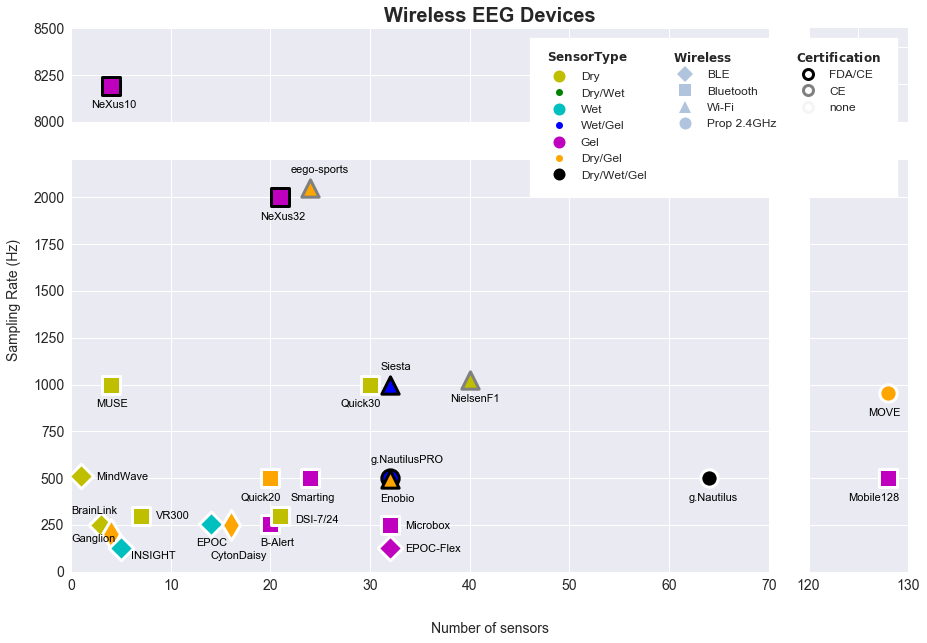

In [113]:
plt.figure(figsize=(15,10))

# Break axis for better visualization
# Otherwise, the left inferior corner is crowded due to the few outliers far away
bax = brokenaxes(xlims=((0,70),(120,130)), ylims=((0,2200),(8000,8500)), hspace=0.15, wspace=0.1)

# Scatter dots
for ii in range(len(DATOS)):
    bax.scatter(DATOS['sensors'][ii], DATOS['sampling'][ii],s=DATOS['markersize'][ii],marker=DATOS['marker'][ii],
                facecolor=DATOS['color'][ii],edgecolor=DATOS['borde'][ii],linewidth=3)

plt.title('Wireless EEG Devices',   fontsize=20, fontweight='bold')
bax.set_xlabel('Number of sensors', fontsize=14, labelpad=1)
bax.set_ylabel('Sampling Rate (Hz)',fontsize=14, labelpad=50)

bax.tick_params(axis='x', labelsize=14)
bax.tick_params(axis='y', labelsize=14)

# Axis ticks (gives error for minor ticks, probably due to the broken axis)
'''
bax.tick_params(axis='both', which='major', labelsize=16)
bax.xaxis.set_minor_locator(MultipleLocator(1))
bax.tick_params(which='minor', length=3, color='k', direction='out')
bax.tick_params(which='major', length=5, color='k')
'''

#Add white patch for legends
bax.axs[2].add_patch(Rectangle((46, 2000), 24, 200,  color='w', alpha=1))
bax.axs[3].add_patch(Rectangle((120, 2000), 9, 200, color='w', alpha=1))
bax.axs[0].add_patch(Rectangle((46, 8000), 24, 450,  color='w', alpha=1))
bax.axs[1].add_patch(Rectangle((120, 8000), 9, 450, color='w', alpha=1))

#Prepare legends
custom_markers1=[ Line2D([0],[0], marker='o',color='none', mfc='y', ms=12, label='Dry'),
                  Line2D([0],[0], marker='o',color='none', mfc='g', ms=7,  label='Dry/Wet'),
                  Line2D([0],[0], marker='o',color='none', mfc='c', ms=12, label='Wet'),
                  Line2D([0],[0], marker='o',color='none', mfc='b', ms=7,  label='Wet/Gel'),
                  Line2D([0],[0], marker='o',color='none', mfc='m', ms=12, label='Gel'),
                  Line2D([0],[0], marker='o',color='none', mfc='orange',ms=7,label='Dry/Gel'),
                  Line2D([0],[0], marker='o',color='none', mfc='k', ms=12, label='Dry/Wet/Gel')]

custom_markers2=[ Line2D([0],[0], marker='D',color='none', ms=12, mfc='lightsteelblue', label='BLE'),
                  Line2D([0],[0], marker='s',color='none', ms=12, mfc='lightsteelblue', label='Bluetooth'),
                  Line2D([0],[0], marker='^',color='none', ms=12, mfc='lightsteelblue', label='Wi-Fi'),
                  Line2D([0],[0], marker='o',color='none', ms=12, mfc='lightsteelblue', label='Prop 2.4GHz')]

custom_markers3=[ Line2D([0],[0], marker='o',color='none', mfc='w',ms=10, mew=3,label='FDA/CE',mec='k'),
                  Line2D([0],[0], marker='o',color='none', mfc='w',ms=10, mew=3,label='CE',    mec='grey'),
                  Line2D([0],[0], marker='o',color='none', mfc='w',ms=10, mew=3,label='none',  mec='whitesmoke')]


# Plot legends
legend1 = plt.legend(handles=custom_markers1, title=r'$\bf{Sensor Type}$', title_fontsize=12, 
                     loc='upper right',bbox_to_anchor=(0.7,0.98),frameon=1, facecolor='w',framealpha=1,fontsize=12)
legend2 = plt.legend(handles=custom_markers2, title=r'$\bf{Wireless}$', title_fontsize=12,     
                     loc='upper right',bbox_to_anchor=(0.855,0.98),frameon=1, facecolor='w',framealpha=1,fontsize=12)
legend3 = plt.legend(handles=custom_markers3, title=r'$\bf{Certification}$', title_fontsize=12, 
                     loc='upper right',bbox_to_anchor=(0.98,0.98),frameon=1, facecolor='w',framealpha=1,fontsize=12)

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)

# Align legends to the left
legend1._legend_box.align = 'left'
legend2._legend_box.align = 'left'
legend3._legend_box.align = 'left'
# Remove borders
legend1.get_frame().set_edgecolor('w')
legend2.get_frame().set_edgecolor('w')
legend3.get_frame().set_edgecolor('w')


# Ploting the text for each device name automatically is a bit crowded
# Finally I have decided to do it individually for each device, so the figure looks nicer and easier to read
bax.axs[2].text( DATOS['sensors'][0]+1.5, DATOS['sampling'][0]-20,  DATOS['dev1'][0], color='k',fontsize=fs) # 0 MindWave
bax.axs[2].text( DATOS['sensors'][1]-3,   DATOS['sampling'][1]+60,  DATOS['dev1'][1], color='k',fontsize=fs) # 1 BrainLink
bax.axs[2].text( DATOS['sensors'][2]-4,   DATOS['sampling'][2]-40,  DATOS['dev1'][2], color='k',fontsize=fs) # 2 Ganglion
bax.axs[0].text( DATOS['sensors'][3]-2,   DATOS['sampling'][3]-120, DATOS['dev1'][3], color='k',fontsize=fs) # 3 NeXus-10
bax.axs[2].text( DATOS['sensors'][4]+1,   DATOS['sampling'][4]-60,  DATOS['dev1'][4], color='k',fontsize=fs) # 4 INSIGHT
bax.axs[2].text( DATOS['sensors'][5]-1.5, DATOS['sampling'][5]-120, DATOS['dev1'][5], color='k',fontsize=fs) # 5 MUSE
bax.axs[2].text( DATOS['sensors'][6]+1.5, DATOS['sampling'][6]-20,  DATOS['dev1'][6], color='k',fontsize=fs) # 6 VR300
bax.axs[2].text( DATOS['sensors'][7]-1.5, DATOS['sampling'][7]-120, DATOS['dev1'][7], color='k',fontsize=fs) # 7 EPOC
bax.axs[2].text( DATOS['sensors'][8]-2,   DATOS['sampling'][8]-180, DATOS['dev1'][8], color='k',fontsize=fs) # 8 OpenBCI
bax.axs[2].text( DATOS['sensors'][9]-1,   DATOS['sampling'][9]-120, DATOS['dev1'][9], color='k',fontsize=fs) # 9 B-Alert
bax.axs[2].text( DATOS['sensors'][10]-3,  DATOS['sampling'][10]-120,DATOS['dev1'][10],color='k',fontsize=fs) # 10 Quick 20
bax.axs[2].text( DATOS['sensors'][11]+1.5,DATOS['sampling'][11]-40, DATOS['dev1'][11],color='k',fontsize=fs) # 11 DSI 7/24
bax.axs[2].text( DATOS['sensors'][12]-2,  DATOS['sampling'][12]-120,DATOS['dev1'][12],color='k',fontsize=fs) # 12 NeXus-32
bax.axs[2].text( DATOS['sensors'][13]-2,  DATOS['sampling'][13]-120,DATOS['dev1'][13],color='k',fontsize=fs) # 13 Smarting
bax.axs[2].text( DATOS['sensors'][14]-2,  DATOS['sampling'][14]+80, DATOS['dev1'][14],color='k',fontsize=fs) # 14 eego sports
bax.axs[2].text( DATOS['sensors'][15]-3,  DATOS['sampling'][15]-120,DATOS['dev1'][15],color='k',fontsize=fs) # 15 Quick 30
bax.axs[2].text( DATOS['sensors'][16]+1.5,DATOS['sampling'][16]-20, DATOS['dev1'][16],color='k',fontsize=fs) # 16 Microbox
bax.axs[2].text( DATOS['sensors'][17]-2,  DATOS['sampling'][17]+80, DATOS['dev1'][17],color='k',fontsize=fs) # 17 g.Nautilus PRO
bax.axs[2].text( DATOS['sensors'][18]-1,  DATOS['sampling'][18]-120,DATOS['dev1'][18],color='k',fontsize=fs) # 18 Enobio
bax.axs[2].text( DATOS['sensors'][19]-1,  DATOS['sampling'][19]+80, DATOS['dev1'][19],color='k',fontsize=fs) # 19 Siesta Wireless 
bax.axs[2].text( DATOS['sensors'][20]+1.5,DATOS['sampling'][20]-20, DATOS['dev1'][20],color='k',fontsize=fs) # 20 EPOC Flex
bax.axs[2].text( DATOS['sensors'][21]-2,  DATOS['sampling'][21]-120,DATOS['dev1'][21],color='k',fontsize=fs) # 21 Nielsen F1
bax.axs[2].text( DATOS['sensors'][22]-2,  DATOS['sampling'][22]-120,DATOS['dev1'][22],color='k',fontsize=fs) # 22 g.Nautilus
bax.axs[3].text( DATOS['sensors'][23]-2,  DATOS['sampling'][23]-120,DATOS['dev1'][23],color='k',fontsize=fs) # 23 MOVE
bax.axs[3].text( DATOS['sensors'][24]-4,  DATOS['sampling'][24]-120,DATOS['dev1'][24],color='k',fontsize=fs) # 24 Mobile 128

plt.show()

In [64]:
#abajo   x-2   y-120
#arriba  x-2   y+80
#derecha x+1.5 y-20